# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [79]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [80]:
# %pip install country-converter

### Import Statements

In [1126]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.dates as mdates

import country_converter as coco

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [1127]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 99

### Load the Data

In [1128]:
df_data = pd.read_csv('mission_launches.csv')
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

##### Shape of df_data:

In [1129]:
df_data.shape

(4324, 9)

##### Rows & Columns

In [1130]:
print(f'{df_data.shape[0]} rows and {df_data.shape[1]} columns')

4324 rows and 9 columns


##### Column Names

In [1131]:
print('Column Names:')
for name in df_data.columns:
    print(f'     - {name}')

Column Names:
     - Unnamed: 0.1
     - Unnamed: 0
     - Organisation
     - Location
     - Date
     - Detail
     - Rocket_Status
     - Price
     - Mission_Status


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [1132]:
df_data.duplicated().any()

False

In [1133]:
df_data = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [1134]:
df_data.drop_duplicates(keep='first', inplace=True)

In [1135]:
df_data.shape

(4323, 7)

## Descriptive Statistics

In [1136]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [1137]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4323 non-null   object
 1   Location        4323 non-null   object
 2   Date            4323 non-null   object
 3   Detail          4323 non-null   object
 4   Rocket_Status   4323 non-null   object
 5   Price           963 non-null    object
 6   Mission_Status  4323 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [1138]:
df_launches = df_data['Organisation'].value_counts().reset_index()[:30]
df_launches

,Organisation,count
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,250
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [1139]:
fig = px.bar(df_launches, x='Organisation', y='count',
             color='count',
             labels={'count':'Number of Launches'}, height=400)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [1140]:
df_rocket_status = df_data['Rocket_Status'].value_counts()
df_rocket_status

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

In [1141]:
fig=px.pie(labels=df_rocket_status.index.values, values=df_rocket_status.values, title='Rocket Status', names=df_rocket_status.index.values)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [1142]:
df_mission_status = df_data['Mission_Status'].value_counts()
df_mission_status

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [1143]:
fig = px.pie(labels=df_mission_status.index.values, values=df_mission_status.values, title="Mission Status", 
                     names=df_mission_status.index, hole=0.6)

fig.update_traces(textposition='outside', textfont_size=15, textinfo='percent + label')

fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

##### Clean and Convert Data to Numeric

In [1144]:
df_data['Price'].unique()

array(['50.0', '29.75', nan, '65.0', '145.0', '64.68', '48.5', '90.0',
       '46.0', '28.3', '29.15', '7.5', '30.8', '5.3', '12.0', '112.5',
       '120.0', '153.0', '200.0', '85.0', '115.0', '41.8', '21.0', '31.0',
       '40.0', '164.0', '62.0', '37.0', '350.0', '39.0', '47.0', '35.0',
       '69.7', '109.0', '45.0', '123.0', '130.0', '25.0', '56.5', '15.0',
       '29.0', '80.0', '140.0', '55.0', '59.5', '450.0', '7.0', '20.14',
       '133.0', '190.0', '135.0', '20.0', '136.6', '5,000.0', '1,160.0',
       '59.0', '63.23'], dtype=object)

In [1145]:
df_data['Price'] = df_data['Price'].str.replace(",", "")
df_data['Price'].unique()

array(['50.0', '29.75', nan, '65.0', '145.0', '64.68', '48.5', '90.0',
       '46.0', '28.3', '29.15', '7.5', '30.8', '5.3', '12.0', '112.5',
       '120.0', '153.0', '200.0', '85.0', '115.0', '41.8', '21.0', '31.0',
       '40.0', '164.0', '62.0', '37.0', '350.0', '39.0', '47.0', '35.0',
       '69.7', '109.0', '45.0', '123.0', '130.0', '25.0', '56.5', '15.0',
       '29.0', '80.0', '140.0', '55.0', '59.5', '450.0', '7.0', '20.14',
       '133.0', '190.0', '135.0', '20.0', '136.6', '5000.0', '1160.0',
       '59.0', '63.23'], dtype=object)

In [1146]:
df_data['Price'] = df_data['Price'].astype(float)*1000000
df_data['Price']

0       50,000,000.00
1       29,750,000.00
2                 NaN
3       65,000,000.00
4      145,000,000.00
            ...      
4319              NaN
4320              NaN
4321              NaN
4322              NaN
4323              NaN
Name: Price, Length: 4323, dtype: float64

##### Exclude NaN values

In [1147]:
df_prices = df_data[df_data['Price'].notna()]

In [1148]:
fig = px.histogram(df_prices, x="Price")
fig.update_layout(
    xaxis_title='Prices', yaxis_title='Count',)
fig.show()

#### Launch Cost -- Mostly between USD25million - USD74million

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [1149]:
orgnisations = df_data['Organisation'].unique()
print(orgnisations)

['SpaceX' 'CASC' 'Roscosmos' 'ULA' 'JAXA' 'Northrop' 'ExPace' 'IAI'
 'Rocket Lab' 'Virgin Orbit' 'VKS RF' 'MHI' 'IRGC' 'Arianespace' 'ISA'
 'Blue Origin' 'ISRO' 'Exos' 'ILS' 'i-Space' 'OneSpace' 'Landspace'
 'Eurockot' 'Land Launch' 'CASIC' 'KCST' 'Sandia' 'Kosmotras' 'Khrunichev'
 'Sea Launch' 'KARI' 'ESA' 'NASA' 'Boeing' 'ISAS' 'SRC' 'MITT' 'Lockheed'
 'AEB' 'Starsem' 'RVSN USSR' 'EER' 'General Dynamics' 'Martin Marietta'
 'Yuzhmash' 'Douglas' 'ASI' 'US Air Force' 'CNES' 'CECLES' 'RAE' 'UT'
 'OKB-586' 'AMBA' "Arm??e de l'Air" 'US Navy']


In [1150]:
len(orgnisations)

56

In [1153]:
correspondence = {
    'SpaceX': 'USA',
    'CASC': 'China',
    'Roscosmos': 'Russia Federation',
    'ULA': 'USA',
    'JAXA': 'Japan',
    'Northrop': 'USA',
    'ExPace': 'China',
    'IAI': 'Israel',
    'Rocket Lab': 'New Zealand',
    'Virgin Orbit': 'USA',
    'VKS RF': 'Russia Federation',
    'MHI': 'Japan',
    'IRGC': 'Iran',
    'Arianespace': 'France',
    'ISA': 'Israel',
    'Blue Origin': 'USA',
    'ISRO': 'India',
    'Exos': 'USA',
    'ILS': 'USA',
    'i-Space': 'China',
    'OneSpace': 'China',
    'Landspace': 'China',
    'Eurockot': 'Germany',
    'Land Launch': 'Switzerland',
    'CASIC': 'China',
    'KCST': 'North Korea',
    'Sandia': 'USA',
    'Kosmotras': 'Russia Federation',
    'Khrunichev': 'Russia Federation',
    'Sea Launch': 'Switzerland',
    'KARI': 'South Korea',
    'ESA': 'France',
    'NASA': 'USA',
    'Boeing': 'USA',
    'ISAS': 'Japan',
    'SRC': 'Russia Federation',
    'MITT': 'Russia Federation',
    'Lockheed': 'USA',
    'AEB': 'Brazil',
    'Starsem': 'France',
    'RVSN USSR': 'Russia Federation',
    'EER': 'USA',
    'General Dynamics': 'USA',
    'Martin Marietta': 'USA',
    'Yuzhmash': 'Ukraine',
    'Douglas': 'Russia Federation',
    'ASI': 'Italy',
    'US Air Force': 'USA',
    'CNES': 'France',
    'CECLES': 'France',
    'RAE': 'UK',
    'UT': 'Japan',
    'OKB-586': 'Ukraine',
    'ABMA': 'USA',
    "Arm??e de l'Air": 'France',
    "US Navy": 'USA'
}

df_data['Country'] = df_data['Organisation'].map(correspondence)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,"50,000,000.00",Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,"29,750,000.00",Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,"65,000,000.00",Success,Russia Federation
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,"145,000,000.00",Success,USA


In [1154]:
cc = coco.CountryConverter()

In [1155]:
df_countries = df_data[df_data['Country'].notna()].copy()
df_countries.loc[df_data['Country'] == None]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country


In [1156]:
df_countries['Alpha_3'] = cc.pandas_convert(series=df_countries['Country'], to='ISO3') 
df_countries.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Alpha_3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,"50,000,000.00",Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,"29,750,000.00",Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,"65,000,000.00",Success,Russia Federation,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,"145,000,000.00",Success,USA,USA


# Use a Choropleth Map to Show the Number of Failures by Country


In [1157]:
df_countries_failed = df_countries[df_countries['Mission_Status']=='Failure'].groupby(['Country', 'Alpha_3'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_countries_failed

,Country,Alpha_3,Mission_Status
0,Brazil,BRA,2
1,China,CHN,19
2,France,FRA,15
3,Germany,DEU,1
4,India,IND,8
5,Israel,ISR,10
6,Japan,JPN,10
7,New Zealand,NZL,2
8,North Korea,PRK,3
9,Russia Federation,RUS,134


In [1158]:
world_map = px.choropleth(
    df_countries_failed,
    locations='Alpha_3',
    color='Mission_Status',
    hover_name='Country',
    title="Number of Failure by Country",
    color_continuous_scale=px.colors.sequential.matter
                         )

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [1159]:
df_sun = df_countries.groupby(['Country', 'Organisation', 'Mission_Status'])['Date'].count().reset_index()
df_sun

,Country,Organisation,Mission_Status,Date
0,Brazil,AEB,Failure,2
1,Brazil,AEB,Prelaunch Failure,1
2,China,CASC,Failure,14
3,China,CASC,Partial Failure,6
4,China,CASC,Success,230
...,...,...,...,...
111,USA,US Navy,Partial Failure,1
112,USA,US Navy,Success,2
113,USA,Virgin Orbit,Failure,1
114,Ukraine,OKB-586,Success,2


In [1160]:
fig = px.sunburst(df_sun, path = ["Country", "Organisation", "Mission_Status"], values = "Date", title = "Sunburst Chart by Country")
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [1161]:
df_prices_by_organization = df_prices.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum, 'Date': pd.Series.count})
df_prices_by_organization.head()

,Organisation,Price,Date
0,Arianespace,"16,345,000,000.00",96
1,Boeing,"1,241,000,000.00",7
2,CASC,"6,310,510,000.00",157
3,EER,"20,000,000.00",1
4,ESA,"37,000,000.00",1


In [1162]:
df_prices_by_organization['Ave_Cost_Per_Launch'] = df_prices_by_organization['Price'] / df_prices_by_organization['Date']
df_prices_by_organization.head()

,Organisation,Price,Date,Ave_Cost_Per_Launch
0,Arianespace,"16,345,000,000.00",96,"170,260,416.67"
1,Boeing,"1,241,000,000.00",7,"177,285,714.29"
2,CASC,"6,310,510,000.00",157,"40,194,331.21"
3,EER,"20,000,000.00",1,"20,000,000.00"
4,ESA,"37,000,000.00",1,"37,000,000.00"


In [1163]:
fig = px.bar(
   df_prices_by_organization, 
    x = "Price",
    y = 'Organisation', 
    orientation='h',
    title = "Total Spent Money by Organization",
    color=df_prices_by_organization['Price'],
    color_continuous_scale='purp'
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},  
    xaxis=dict(type='log'),
    xaxis_title='Organization', 
    yaxis_title='Cost'
)

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [1164]:
df_ave_cost_organisation = df_prices_by_organization[['Organisation', 'Ave_Cost_Per_Launch']][:20]
df_ave_cost_organisation.head()

,Organisation,Ave_Cost_Per_Launch
0,Arianespace,"170,260,416.67"
1,Boeing,"177,285,714.29"
2,CASC,"40,194,331.21"
3,EER,"20,000,000.00"
4,ESA,"37,000,000.00"


In [1165]:
fig = px.bar(
    df_ave_cost_organisation, 
    x = "Ave_Cost_Per_Launch",
    y = 'Organisation', 
    orientation='h',
    title = "Amount of Money Spent by Organisation per Launch",
    color=df_ave_cost_organisation['Ave_Cost_Per_Launch'],
#     color_continuous_scale='purp'
    color_continuous_scale=["red", "green", "blue"]
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},  
    xaxis=dict(type='log'),
    xaxis_title='Organization', 
    yaxis_title='Cost'
)

fig.show()

# Chart the Number of Launches per Year

#### Convert Datum into Date and Year

In [1174]:
df_data_date = df_data[df_data['Date'].notna()]
df_data_date['Date'].isna().any()

False

In [1175]:
def convert_year(x):
    try:
        x = x.split()
        year = x[3]
        return year
    except:
        return None

df_data_date['Year'] = df_data_date['Date'].apply(convert_year)
df_data_date.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,"50,000,000.00",Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,"29,750,000.00",Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,"65,000,000.00",Success,Russia Federation,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,"145,000,000.00",Success,USA,2020


In [1176]:
df_data_date['Year']=df_data_date['Year'].astype(int)

In [1177]:
df_data_date.dtypes

Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
Country            object
Year                int64
dtype: object

In [1178]:
df_data_date['Date'].isna().any()

False

In [1179]:
df_data_date['Date'] = df_data_date['Date'].apply(lambda x: x.replace(" UTC", ""))

In [1180]:
def convert_date(x):
    try:
        date_format = '%a %b %d, %Y %H:%M'
        date_obj = datetime.strptime(x, date_format)
        return date_obj
    except:
        date_format = '%a %b %d, %Y'
        date_obj = datetime.strptime(x, date_format)
        return date_obj

df_data_date['Date'] =  df_data_date['Date'].apply(convert_date)
df_data_date.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,"50,000,000.00",Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,"29,750,000.00",Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,"65,000,000.00",Success,Russia Federation,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,"145,000,000.00",Success,USA,2020


In [1181]:
df_data_date.dtypes

Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
Country                   object
Year                       int64
dtype: object

In [1182]:
df_data_date[df_data_date['Date'].isna()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year


In [1183]:
df_launch_by_year = df_data_date.groupby('Year', as_index=False).count()
df_launch_by_year.head()

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,1957,3,3,3,3,3,0,3,3
1,1958,28,28,28,28,28,0,28,21
2,1959,20,20,20,20,20,0,20,20
3,1960,39,39,39,39,39,0,39,39
4,1961,52,52,52,52,52,0,52,52


In [1184]:
fig = px.bar(df_launch_by_year, x = "Year", y = "Detail", title = "Number of Launches by Year", width=1000, height=600)
fig.update_layout(
    xaxis_title='Year', 
     yaxis_title='Number of Launches')
fig.update_xaxes(tickangle=45)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [1185]:
df_monthly = df_data_date.groupby(df_data_date.Date.dt.to_period('M')).agg({'Detail': pd.Series.count}).reset_index()
df_monthly.head()

,Date,Detail
0,1957-10,1
1,1957-11,1
2,1957-12,1
3,1958-02,2
4,1958-03,3


In [1186]:
df_monthly['Date'] =df_monthly['Date'].astype('datetime64[ns]') 
df_monthly.head()

,Date,Detail
0,1957-10-01,1
1,1957-11-01,1
2,1957-12-01,1
3,1958-02-01,2
4,1958-03-01,3


In [1187]:
df_rolling_avg = pd.DataFrame(df_monthly.set_index(['Date'])['Detail'].rolling(window=6).mean())

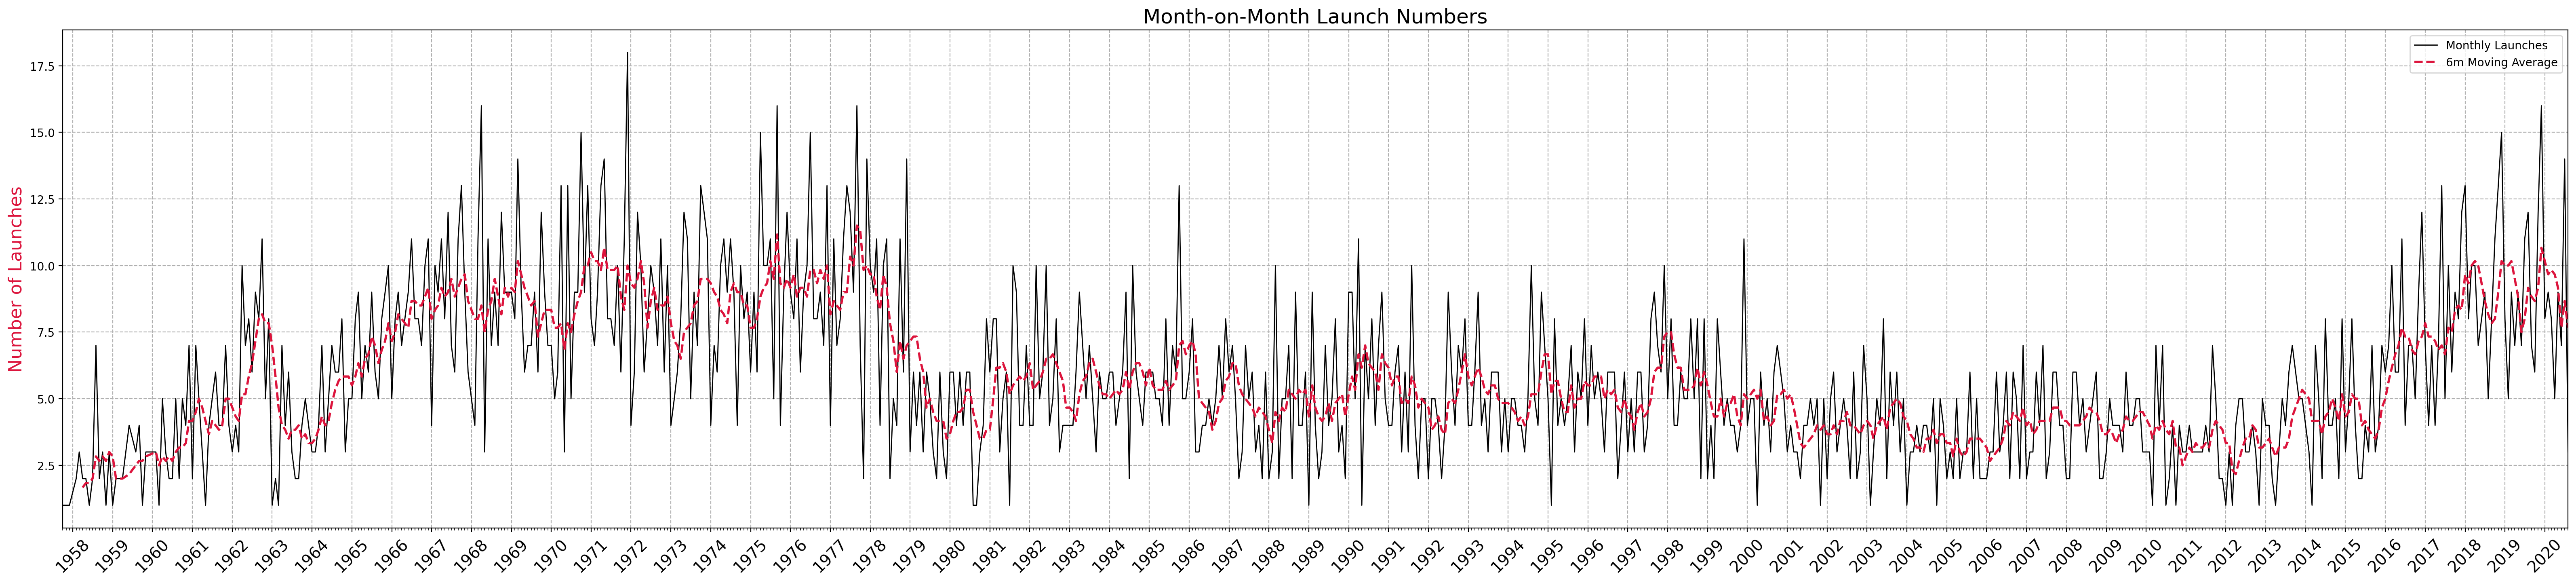

In [1188]:
plt.figure(figsize=(40, 8), dpi=200)
plt.title('Month-on-Month Launch Numbers', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.grid(ls='--')

ax1 = plt.gca()

ax1.set_ylabel('Number of Launches', fontsize=16, color='crimson')

ax1.set_xlim(df_monthly.Date.min(), df_monthly.Date.max())

years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


ax1.plot(df_monthly.Date, df_monthly.Detail, linewidth=1, color='black', label='Monthly Launches')
ax1.plot(df_rolling_avg.index, df_rolling_avg.Detail, linewidth=2, ls='--', color='crimson',  label='6m Moving Average')

ax1.legend()

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [1189]:
df_launch_by_month=df_data_date.groupby(df_data_date.Date.dt.month, as_index=True).agg({'Detail': pd.Series.count})
df_launch_by_month.head()

,Detail
Date,
1,268
2,336
3,353
4,383
5,326


#### Most Popular Month = December

In [1190]:
df_launch_by_month.idxmax()

Detail    12
dtype: int32

#### Least Popular Month = January

In [1191]:
df_launch_by_month.idxmin()

Detail    1
dtype: int32

#### Months by Popularity in Descending Order

In [1192]:
df_launch_by_month.sort_values('Detail')

,Detail
Date,
1,268
5,326
11,335
2,336
7,351
3,353
9,365
8,373
10,381


In [1193]:
fig = px.histogram(
    df_launch_by_month, 
    x=df_launch_by_month.index,
    y='Detail',
    width=800, height=400,
    nbins=20)

fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [1194]:
df_prices_ave = df_data_date[df_data_date['Price'].notna()].groupby(['Year'], as_index=False).agg({'Price': pd.Series.mean})
df_prices_ave.head()

,Year,Price
0,1964,"63,230,000.00"
1,1965,"63,230,000.00"
2,1966,"59,000,000.00"
3,1967,"196,625,000.00"
4,1968,"279,200,000.00"


In [1195]:
fig = px.line(
    df_prices_ave,
    x="Year", 
    y="Price", 
    title='Average Launch Price Over Time',
    width=900, height=600
)

fig.update_layout(
    yaxis_title='Accumulated No. of Missions',
    yaxis=dict(type='log'),
                           )

fig.update_xaxes(tickangle=45)


fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [1196]:
top_10_organisations =df_data_date.groupby(['Organisation'], as_index=False).agg({'Detail': pd.Series.count}).sort_values('Detail', ascending = False)[:10]
top_10_organisations

,Organisation,Detail
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,250
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [1197]:
top_10_organisations_data = df_data_date.loc[df_data_date['Organisation'].isin(top_10_organisations['Organisation'])]
top_10_organisations_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,"29,750,000.00",Success,China,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,"145,000,000.00",Success,USA,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,"64,680,000.00",Success,China,2020
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,2020
12,CASC,"LC-3, Xichang Satellite Launch Center, China",2020-07-09 12:11:00,Long March 3B/E | Apstar-6D,StatusActive,"29,150,000.00",Success,China,2020
...,...,...,...,...,...,...,...,...,...
4307,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA",1958-08-17 12:18:00,Thor-DM 18 Able I | Pioneer 0,StatusRetired,NaN,Failure,USA,1958
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,Russia Federation,1958
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,Russia Federation,1958
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Russia Federation,1957


In [1198]:
top_10_organisations_data.dtypes

Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
Country                   object
Year                       int64
dtype: object

In [1199]:
top_10_organisations_data = top_10_organisations_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})
top_10_organisations_data

,Year,Organisation,Detail
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
...,...,...,...
318,2019,VKS RF,8
319,2020,Arianespace,4
320,2020,CASC,19
321,2020,ULA,4


In [1200]:
fig = px.line(
    top_10_organisations_data,
    x="Year", 
    y="Detail", 
    color='Organisation',
    title='Number of Missions by Top 10 Organisations Over Time',
    width=1000, height=800
)

fig.update_layout(
    yaxis_title='No. of Missions',
    yaxis={'categoryorder':'total ascending'}
                           )


# fig['data'][39]['line']['width']=10 # SpaceX
# fig['data'][12]['line']['width']=10 # CASC

fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [1201]:
df_data_date['Country'].unique()

array(['USA', 'China', 'Russia Federation', 'Japan', 'Israel',
       'New Zealand', 'Iran', 'France', 'India', 'Germany', 'Switzerland',
       'North Korea', 'South Korea', 'Brazil', 'Ukraine', 'Italy', 'UK',
       nan], dtype=object)

In [1202]:
df_USA_USSR = df_data_date.loc[(df_data_date['Country'] == 'USA') | (df_data_date['Country'] == 'Russia Federation')  | (df_data_date['Country'] == 'Ukraine')]
df_USA_USSR = df_USA_USSR.loc[df_USA_USSR['Year'] < 1992]
df_USA_USSR

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Russia Federation,1991
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Ukraine,1991
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,1991
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia Federation,1991
...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,1958
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Russia Federation,1957


In [1203]:
df_USA_USSR['Country'] = df_USA_USSR['Country'].replace(['Russia Federation', 'Ukraine'], 'USSR')

In [1205]:
df_USA_USSR_year = df_USA_USSR.groupby(['Year', 'Country'], as_index=False).agg({'Detail': pd.Series.count})
df_USA_USSR_year.head()

,Year,Country,Detail
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,16
3,1958,USSR,5
4,1959,USA,16


In [1206]:
fig = px.line(
    df_USA_USSR_year,
    x="Year", 
    y="Detail", 
    color='Country',
    title='USA vs USSR until 1991',
    width=900, height=800
)

fig.update_layout(
    yaxis_title='No. of Missions',
    yaxis={'categoryorder':'total ascending'}
                           )

fig.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

#### USSR will include: Russia Federation and Ukraine. Launch site locations in Kazakhstan is already reflected via organisation. In my case, the country code is determined based on the organisation's headquarter location rather than launch site.

In [1207]:
 df_USA_USSR

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,USSR,1991
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,1991
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,1991
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,USSR,1991
...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,1958
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,1957


In [1208]:
USA_vs_USSR_launches = df_USA_USSR['Country'].value_counts()
USA_vs_USSR_launches

Country
USSR    1771
USA      654
Name: count, dtype: int64

In [1209]:
fig=px.pie(labels=USA_vs_USSR_launches.index.values, values=USA_vs_USSR_launches.values, title='USA vs USSR Total Launches', names=USA_vs_USSR_launches.index.values)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [1211]:
df_USA_USSR_YoY =  df_USA_USSR.groupby(['Year', 'Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_USA_USSR_YoY['Accum_Launches']=df_USA_USSR_YoY.groupby('Country')['Mission_Status'].cumsum()

df_USA_USSR_YoY.head()

,Year,Country,Mission_Status,Accum_Launches
0,1957,USA,1,1
1,1957,USSR,2,2
2,1958,USA,16,17
3,1958,USSR,5,7
4,1959,USA,16,33


In [1212]:
fig = px.line(
    df_USA_USSR_YoY,
    x="Year", 
    y="Accum_Launches", 
    color='Country',
    title='Total Number of Missions - USA vs USSR',
    width=900, height=600
)

fig.update_layout(
    yaxis_title='Accumulated No. of Missions',
    yaxis={'categoryorder':'total ascending'}
                           )

fig['data'][0]['line']['width']=5
fig['data'][1]['line']['width']=5

fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [1213]:
df_USA_USSR_Failure = df_USA_USSR[df_USA_USSR['Mission_Status'] != 'Success' ]
df_USA_USSR_Failure

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1733,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan",1991-08-30 08:58:00,Zenit-2 | Tselina-2 n†­9,StatusRetired,NaN,Failure,USSR,1991
1743,Northrop,"NB-52B Carrier, Edwards AFB, California, USA",1991-07-21 17:33:00,Pegasus/HAPS | 7 Microsats,StatusRetired,"40,000,000.00",Partial Failure,USA,1991
1746,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1991-06-25 13:20:00,Cosmos-3M (11K65M) | Ta??foun n†­59,StatusRetired,NaN,Failure,USSR,1991
1757,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-04-18 23:30:00,Atlas I | Yuri 3H,StatusRetired,NaN,Failure,USA,1991
1795,RVSN USSR,"Site 45/2, Baikonur Cosmodrome, Kazakhstan",1990-10-04 04:27:00,Zenit-2 | Tselina-2 n†­8,StatusRetired,NaN,Failure,USSR,1990
...,...,...,...,...,...,...,...,...,...
4312,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-05-28 03:46:00,Vanguard | Vanguard SLV-1,StatusRetired,NaN,Failure,USA,1958
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28 02:53:00,Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA,1958
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,USSR,1958
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958


In [1215]:
df_USA_USSR_Failure_YoY = df_USA_USSR_Failure.groupby(['Year', 'Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
df_USA_USSR_Failure_YoY.head()

,Year,Country,Mission_Status
0,1957,USA,1
1,1958,USA,14
2,1958,USSR,4
3,1959,USA,10
4,1959,USSR,2


In [1216]:
fig = px.line(df_USA_USSR_Failure_YoY, x="Year", y="Mission_Status", color='Country')
fig.update_layout(yaxis_title='Number of Failures')
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [1232]:
df_USA_USSR['Mission_Status'] = df_USA_USSR['Mission_Status'].replace(['Partial Failure', 'Prelaunch Failure'], 'Failure')

In [1233]:
df_USA_USSR['Mission_Status'].unique()

array(['Success', 'Failure'], dtype=object)

### Failure Data - USA

In [1234]:
df_USA_Status = df_USA_USSR[df_USA_USSR.loc[:, 'Country'] == 'USA']
df_USA_Status = df_USA_Status[['Year', 'Mission_Status']]
df_USA_Status['Count'] = 1
df_USA_Status

,Year,Mission_Status,Count
1721,1991,Success,1
1722,1991,Success,1
1724,1991,Success,1
1726,1991,Success,1
1732,1991,Success,1
...,...,...,...
4312,1958,Failure,1
4314,1958,Failure,1
4317,1958,Success,1
4319,1958,Failure,1


In [1235]:
df_USA_Status_Table = pd.pivot_table(df_USA_Status, index=["Year"], columns=["Mission_Status"], values=["Count"], aggfunc=np.sum).fillna(0)

In [1236]:
df_USA_Status = df_USA_Status_Table.reset_index()

In [1222]:
df_USA_Status.columns

MultiIndex([( 'Year',        ''),
            ('Count', 'Failure'),
            ('Count', 'Success')],
           names=[None, 'Mission_Status'])

In [1237]:
df_USA_Status = df_USA_Status.set_axis(df_USA_Status.columns.map('_'.join), axis=1)

In [1238]:
df_USA_Status['Total_Missions'] = df_USA_Status['Count_Failure'] + df_USA_Status['Count_Success']
df_USA_Status['Failure_Rate'] = (df_USA_Status['Count_Failure'] / df_USA_Status['Total_Missions']) * 100
df_USA_Status.head()

,Year_,Count_Failure,Count_Success,Total_Missions,Failure_Rate
0,1957,1.00,0.00,1.00,100.00
1,1958,14.00,2.00,16.00,87.50
2,1959,10.00,6.00,16.00,62.50
3,1960,14.00,16.00,30.00,46.67
4,1961,16.00,27.00,43.00,37.21


### Failure Data - USSR

In [1239]:
df_USSR_Status = df_USA_USSR[df_USA_USSR.loc[:, 'Country'] == 'USSR']
df_USSR_Status = df_USSR_Status[['Year', 'Mission_Status']]
df_USSR_Status['Count'] = 1
df_USSR_Status

,Year,Mission_Status,Count
1718,1991,Success,1
1719,1991,Success,1
1723,1991,Success,1
1725,1991,Success,1
1728,1991,Success,1
...,...,...,...
4301,1958,Failure,1
4313,1958,Success,1
4315,1958,Failure,1
4322,1957,Success,1


In [1240]:
df_USSR_Status_Table = pd.pivot_table(df_USSR_Status, index=["Year"], columns=["Mission_Status"], values=["Count"], aggfunc=np.sum).fillna(0)

In [1241]:
df_USSR_Status = df_USSR_Status_Table.reset_index()

In [1242]:
df_USSR_Status = df_USSR_Status.set_axis(df_USSR_Status.columns.map('_'.join), axis=1)

In [1243]:
df_USSR_Status['Total_Missions'] = df_USSR_Status['Count_Failure'] + df_USSR_Status['Count_Success']
df_USSR_Status['Failure_Rate'] = (df_USSR_Status['Count_Failure'] / df_USSR_Status['Total_Missions']) * 100

In [1230]:
df_USA_Status = df_USA_Status.drop(columns=['Count_Failure', 'Count_Success', 'Total_Missions'])
df_USA_Status.head()

,Year_,Failure_Rate
0,1957,100.00
1,1958,87.50
2,1959,62.50
3,1960,46.67
4,1961,37.21


In [1244]:
df_USSR_Status = df_USSR_Status.drop(columns=['Count_Failure', 'Count_Success', 'Total_Missions'])

In [1245]:
df_USA_vs_USSR_Status=pd.merge(df_USA_Status, df_USSR_Status, on='Year_')

In [1246]:
df_USA_vs_USSR_Status = df_USA_vs_USSR_Status.rename(columns={'Year_': 'Year', 'Failure_Rate_x': 'USA', 'Failure_Rate_y': 'USSR'})

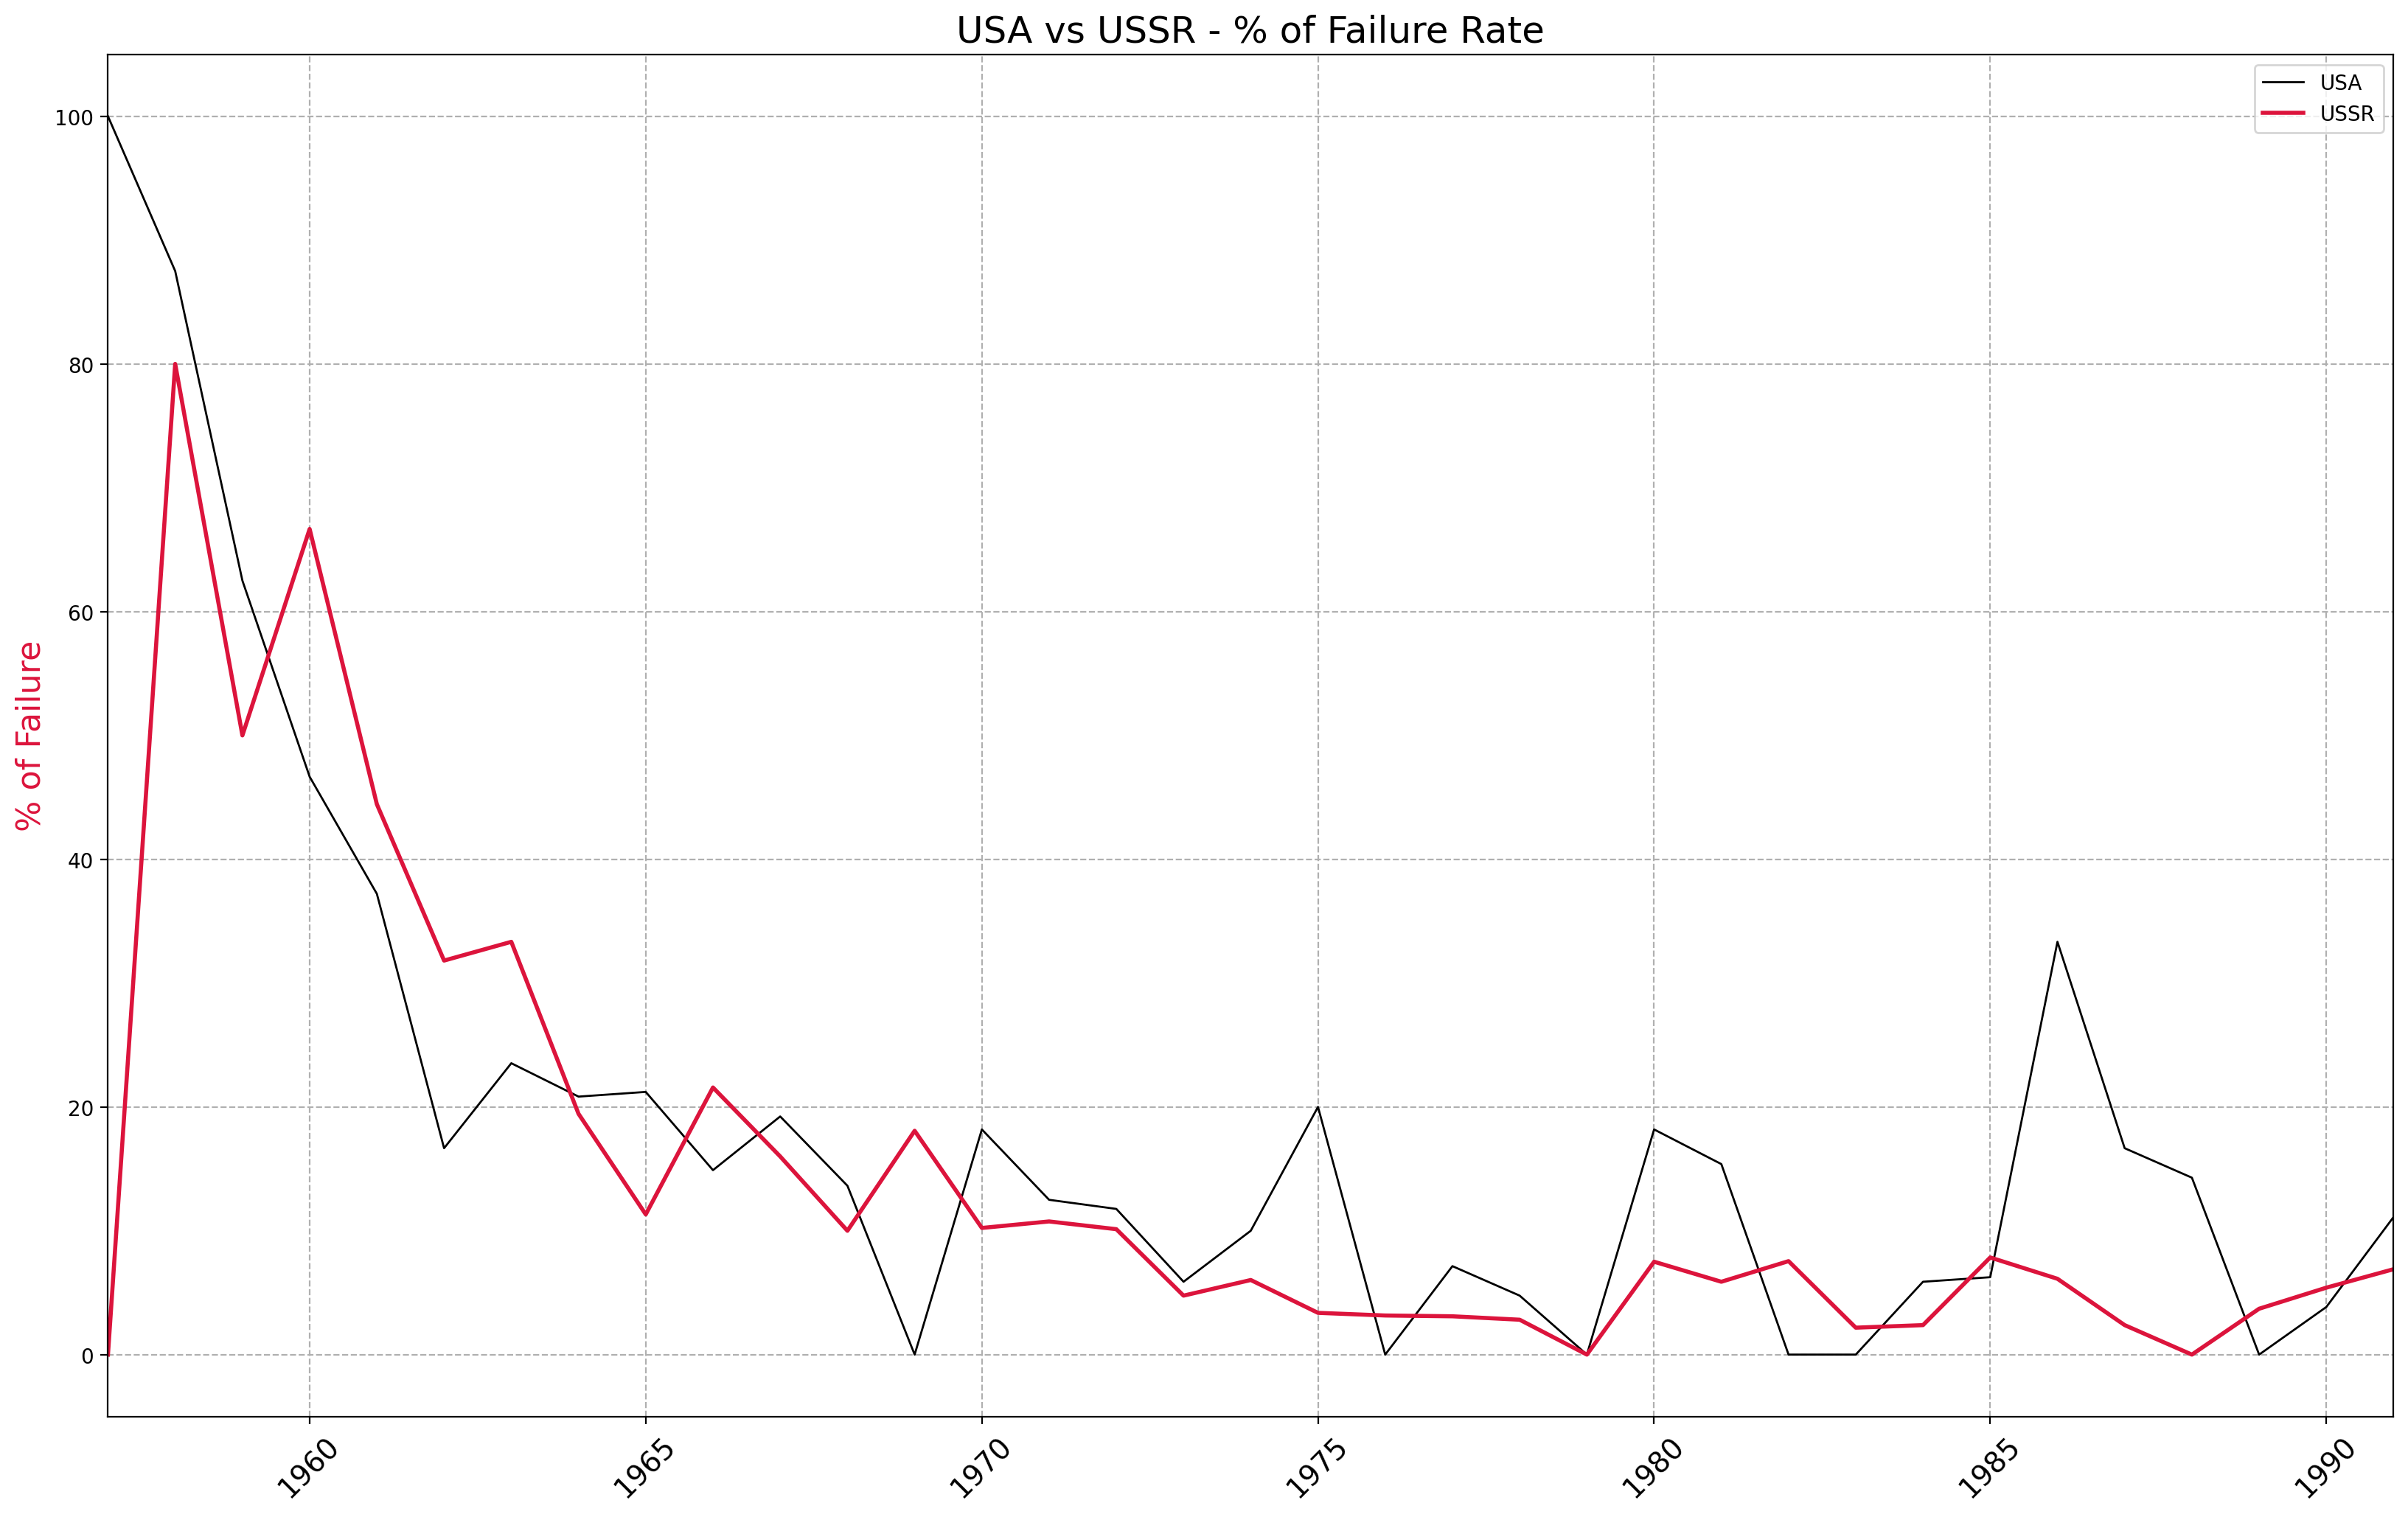

In [1247]:
plt.figure(figsize=(20, 12), dpi=200)
plt.title('USA vs USSR - % of Failure Rate', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.grid(ls='--')

ax1 = plt.gca()

ax1.set_ylabel('% of Failure', fontsize=16, color='crimson')

ax1.set_xlim(df_USA_vs_USSR_Status.Year.min(), df_USA_vs_USSR_Status.Year.max())

ax1.plot(df_USA_vs_USSR_Status.Year, df_USA_vs_USSR_Status.USA, linewidth=1, color='black', label='USA')
ax1.plot(df_USA_vs_USSR_Status.Year,df_USA_vs_USSR_Status.USSR, linewidth=2, ls='-', color='crimson',  label='USSR')

ax1.legend()

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [1251]:
countries_max_launches_by_year =df_data_date.groupby(['Year'])['Country'].agg(pd.Series.mode)
df_countries_max_launches_by_year = pd.DataFrame(countries_max_launches_by_year)

In [1252]:
countries_max_launches_by_year_success =df_data_date[df_data_date['Mission_Status'] == 'Success'].groupby(['Year'])['Country'].agg(pd.Series.mode)
df_countries_max_launches_by_year_success = pd.DataFrame(countries_max_launches_by_year_success)

In [1253]:
df_countries_max_launches_by_year_comparison=pd.merge(df_countries_max_launches_by_year, df_countries_max_launches_by_year_success, on='Year')
df_countries_max_launches_by_year_comparison.rename(columns={'Country_x': 'Mission_Status_ALL', 'Country_y': 'Mission_Status_Success'})

,Mission_Status_ALL,Mission_Status_Success
Year,,
1957,Russia Federation,Russia Federation
1958,USA,USA
1959,USA,USA
1960,USA,USA
1961,USA,USA
1962,USA,USA
1963,Russia Federation,Russia Federation
1964,Russia Federation,Russia Federation
1965,Russia Federation,Russia Federation


### Do the results change if we only look at the number of successful launches? - only in 1966, 2020

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [1254]:
organisations_max_launches_by_year =df_data_date.groupby(['Year'], as_index=False)['Organisation'].agg(pd.Series.mode)
df_organisations_max_launches_by_year = pd.DataFrame(organisations_max_launches_by_year)
df_organisations_max_launches_by_year

,Year,Organisation
0,1957,RVSN USSR
1,1958,US Navy
2,1959,US Air Force
3,1960,US Air Force
4,1961,US Air Force
5,1962,US Air Force
6,1963,RVSN USSR
7,1964,RVSN USSR
8,1965,RVSN USSR
9,1966,RVSN USSR


In [1255]:
df_launchby_organisation_year = df_data_date.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

In [1256]:
fig = px.line(df_launchby_organisation_year, x="Year", y="Detail", color='Organisation')
fig.update_layout(
    yaxis_title='Number of Launches by Organisation',)
fig.show()

### Which organisation was dominant in the 1970s and 1980s? -- USSR
### Which organisation was dominant in 2018, 2019 and 2020? -- CASC